## Analysis of Railbelt Electric Generation Data

In [1]:
import pandas as pd

In [17]:
df_rb = pd.read_csv('proc/generation_rb.csv', parse_dates=['report_date'])
df_rb['year'] = df_rb.report_date.dt.year
df_rb.head()

,plant_id_eia,report_date,fuel_type_code_pudl,fuel_consumed_for_electricity_mmbtu,net_generation_mwh,plant_name_eia,city,year
0,75,2001-01-01,oil,333.0,25.0,Hank Nikkels Plant 1,Anchorage,2001
1,75,2001-02-01,oil,216.0,18.0,Hank Nikkels Plant 1,Anchorage,2001
2,75,2001-03-01,oil,140.0,12.0,Hank Nikkels Plant 1,Anchorage,2001
3,75,2001-04-01,oil,181.0,11.0,Hank Nikkels Plant 1,Anchorage,2001
4,75,2001-05-01,oil,251.0,21.0,Hank Nikkels Plant 1,Anchorage,2001


In [19]:
df_all = df_rb.groupby('year').sum()
df_wind_solar = df_rb.query('fuel_type_code_pudl in ("wind", "solar")').groupby('year').sum()
pct_rb_wind_solar = df_wind_solar.net_generation_mwh / df_all.net_generation_mwh
pct_rb_wind_solar

year
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013    0.023570
2014    0.026018
2015    0.026976
2016    0.028546
2017    0.023233
2018    0.026252
2019    0.024878
2020    0.020846
2021    0.020728
Name: net_generation_mwh, dtype: float64

In [5]:
# Wind Capacity Factors
# Fire Island

def capacity_factor(plant_id, plant_mw):
    mwh = df.query('plant_id_eia == @plant_id').groupby('year').sum().net_generation_mwh
    return mwh / (plant_mw * 8766)

In [6]:
# Fire Island
capacity_factor(58425, 17.6)

year
2013    0.290274
2014    0.309907
2015    0.327725
2016    0.363115
2017    0.309272
2018    0.335938
2019    0.312552
2020    0.305941
2021    0.270667
Name: net_generation_mwh, dtype: float64

In [7]:
# Eva Creek
capacity_factor(57935, 24.6)

year
2013    0.329293
2014    0.332859
2015    0.337520
2016    0.342440
2017    0.285258
2018    0.303807
2019    0.278728
2020    0.213723
2021    0.262693
Name: net_generation_mwh, dtype: float64

In [8]:
# Delta Wind Farm
capacity_factor(58511, 2.0)


year
2013    0.091262
2014    0.256674
2015    0.228154
2016    0.253593
2017    0.148700
2018    0.256559
2019    0.226443
2020    0.219541
2021    0.208419
Name: net_generation_mwh, dtype: float64

In [9]:
gv_solar_kw = 1760*.32    # kW of GVEA Solar. This is DC kW
gv_solar_kwh = 660*12*71   # kWh of GVEA Solar
gv_solar_cf = gv_solar_kwh / (gv_solar_kw * 8766)
gv_solar_cf

0.1138988706365503

### Process full US Dataset

In [20]:
dfus = pd.read_csv('proc/generation_us.csv', parse_dates=['report_date'])
dfus['year'] =  dfus.report_date.dt.year
dfus.head()

,plant_id_eia,report_date,fuel_type_code_pudl,net_generation_mwh,year
0,2,2001-01-01,hydro,18918.0,2001
1,2,2001-02-01,hydro,30207.0,2001
2,2,2001-03-01,hydro,37749.0,2001
3,2,2001-04-01,hydro,27284.0,2001
4,2,2001-05-01,hydro,8961.0,2001


In [21]:
dfus_all = dfus.groupby('year').sum()
dfus_wind_solar = dfus.query('fuel_type_code_pudl in ("wind", "solar")').groupby('year').sum()
pct_us_wind_solar = dfus_wind_solar.net_generation_mwh / dfus_all.net_generation_mwh
pct_us_wind_solar

year
2001    0.002204
2002    0.003551
2003    0.003820
2004    0.004448
2005    0.005618
2006    0.008268
2007    0.010468
2008    0.016972
2009    0.023620
2010    0.028801
2011    0.036670
2012    0.043858
2013    0.053942
2014    0.060390
2015    0.066049
2016    0.080371
2017    0.095228
2018    0.099817
2019    0.110884
2020    0.132754
2021    0.148278
Name: net_generation_mwh, dtype: float64

In [22]:
# US Data using the IEA dataset
dfi = pd.read_csv('iea/US_MES_0223.csv', parse_dates=['Month'])
dfi['year'] = dfi.Month.dt.year
dfi.head()

,Month,Balance,Product,Value,Unit,year
0,2023-02-01,Net Electricity Production,Electricity,314908.0743,GWh,2023
1,2023-02-01,Net Electricity Production,Nuclear,60777.0947,GWh,2023
2,2023-02-01,Net Electricity Production,Total Combustible Fuels,178365.2634,GWh,2023
3,2023-02-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",48751.0713,GWh,2023
4,2023-02-01,Net Electricity Production,Oil and Petroleum Products,2464.7102,GWh,2023


In [23]:
dfi_all = dfi.query('Balance == "Net Electricity Production" and Product == "Electricity"').groupby('year').sum()
dfi_all

,Value
year,
2010,4.158959e+06
2011,4.136136e+06
2012,4.077151e+06
2013,4.093401e+06
2014,4.123552e+06
2015,4.109219e+06
2016,4.119445e+06
2017,4.086003e+06
2018,4.236927e+06


In [24]:
dfi_wind_solar = dfi.query('Balance == "Net Electricity Production" and Product in ("Wind", "Solar")').groupby('year').sum()
dfi_wind_solar

,Value
year,
2010,98499.9970
2011,126259.9990
2012,150813.9970
2013,183518.0020
2014,206895.0020
2015,225750.9980
2016,276223.1900
2017,324622.5970
2018,356980.3682


In [25]:
pct_iea_wind_solar = dfi_wind_solar / dfi_all
pct_iea_wind_solar

,Value
year,
2010,0.023684
2011,0.030526
2012,0.036990
2013,0.044833
2014,0.050174
2015,0.054938
2016,0.067054
2017,0.079447
2018,0.084255


<AxesSubplot:xlabel='year'>

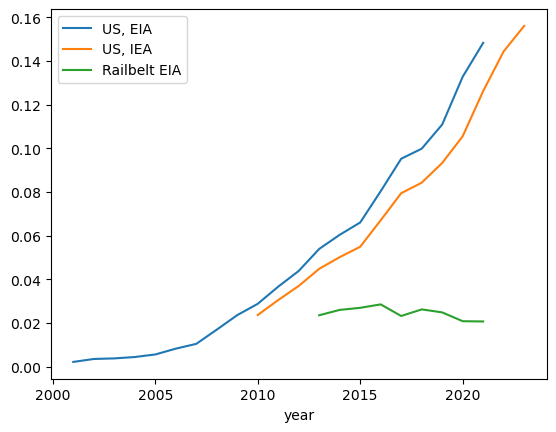

In [28]:
dfs = pd.concat([ pct_us_wind_solar,  pct_iea_wind_solar,  pct_rb_wind_solar], axis=1)
dfs.columns = ['US, EIA', 'US, IEA', 'Railbelt EIA']
dfs.plot()

In [29]:
dfs

,"US, EIA","US, IEA",Railbelt EIA
year,,,
2001,0.002204,NaN,NaN
2002,0.003551,NaN,NaN
2003,0.003820,NaN,NaN
2004,0.004448,NaN,NaN
2005,0.005618,NaN,NaN
2006,0.008268,NaN,NaN
2007,0.010468,NaN,NaN
2008,0.016972,NaN,NaN
2009,0.023620,NaN,NaN
